# Salary Project

In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [59]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [60]:
df.shape

(397, 6)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [62]:
df.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [63]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [64]:
df.duplicated().sum()

4

In [65]:
data = df.drop_duplicates()

In [66]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [68]:
rank_encoding = le.fit_transform(data['rank'])

In [69]:
pd.Series(rank_encoding)

0      2
1      2
2      1
3      2
4      2
      ..
388    2
389    2
390    2
391    2
392    1
Length: 393, dtype: int32

In [70]:
#replacing with original dataset

data['rank'] = rank_encoding

data

C:\Users\NAYANP~1\AppData\Local\Temp/ipykernel_10972/4089548252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rank'] = rank_encoding


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,B,19,18,Male,139750
1,2,B,20,16,Male,173200
2,1,B,4,3,Male,79750
3,2,B,45,39,Male,115000
4,2,B,40,41,Male,141500
...,...,...,...,...,...,...
392,2,A,33,30,Male,103106
393,2,A,31,19,Male,150564
394,2,A,42,25,Male,101738
395,2,A,25,15,Male,95329


In [71]:
discipline = le.fit_transform(data['discipline'])

pd.Series('discipline')

0    discipline
dtype: object

In [72]:
data['discipline'] = discipline

data

C:\Users\NAYANP~1\AppData\Local\Temp/ipykernel_10972/665267618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['discipline'] = discipline


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,Male,139750
1,2,1,20,16,Male,173200
2,1,1,4,3,Male,79750
3,2,1,45,39,Male,115000
4,2,1,40,41,Male,141500
...,...,...,...,...,...,...
392,2,0,33,30,Male,103106
393,2,0,31,19,Male,150564
394,2,0,42,25,Male,101738
395,2,0,25,15,Male,95329


In [73]:
data['discipline'].unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
392    0
393    0
394    0
395    0
396    0
Name: discipline, Length: 393, dtype: int32>

In [74]:
sex_encoding = le.fit_transform(data['sex'])

pd.Series(sex_encoding)

0      1
1      1
2      1
3      1
4      1
      ..
388    1
389    1
390    1
391    1
392    1
Length: 393, dtype: int32

In [75]:
data['sex'] = sex_encoding

data

C:\Users\NAYANP~1\AppData\Local\Temp/ipykernel_10972/2983725145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = sex_encoding


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [76]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


C:\Users\NAYAN PRADEEP DALVI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NAYAN PRADEEP DALVI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NAYAN PRADEEP DALVI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

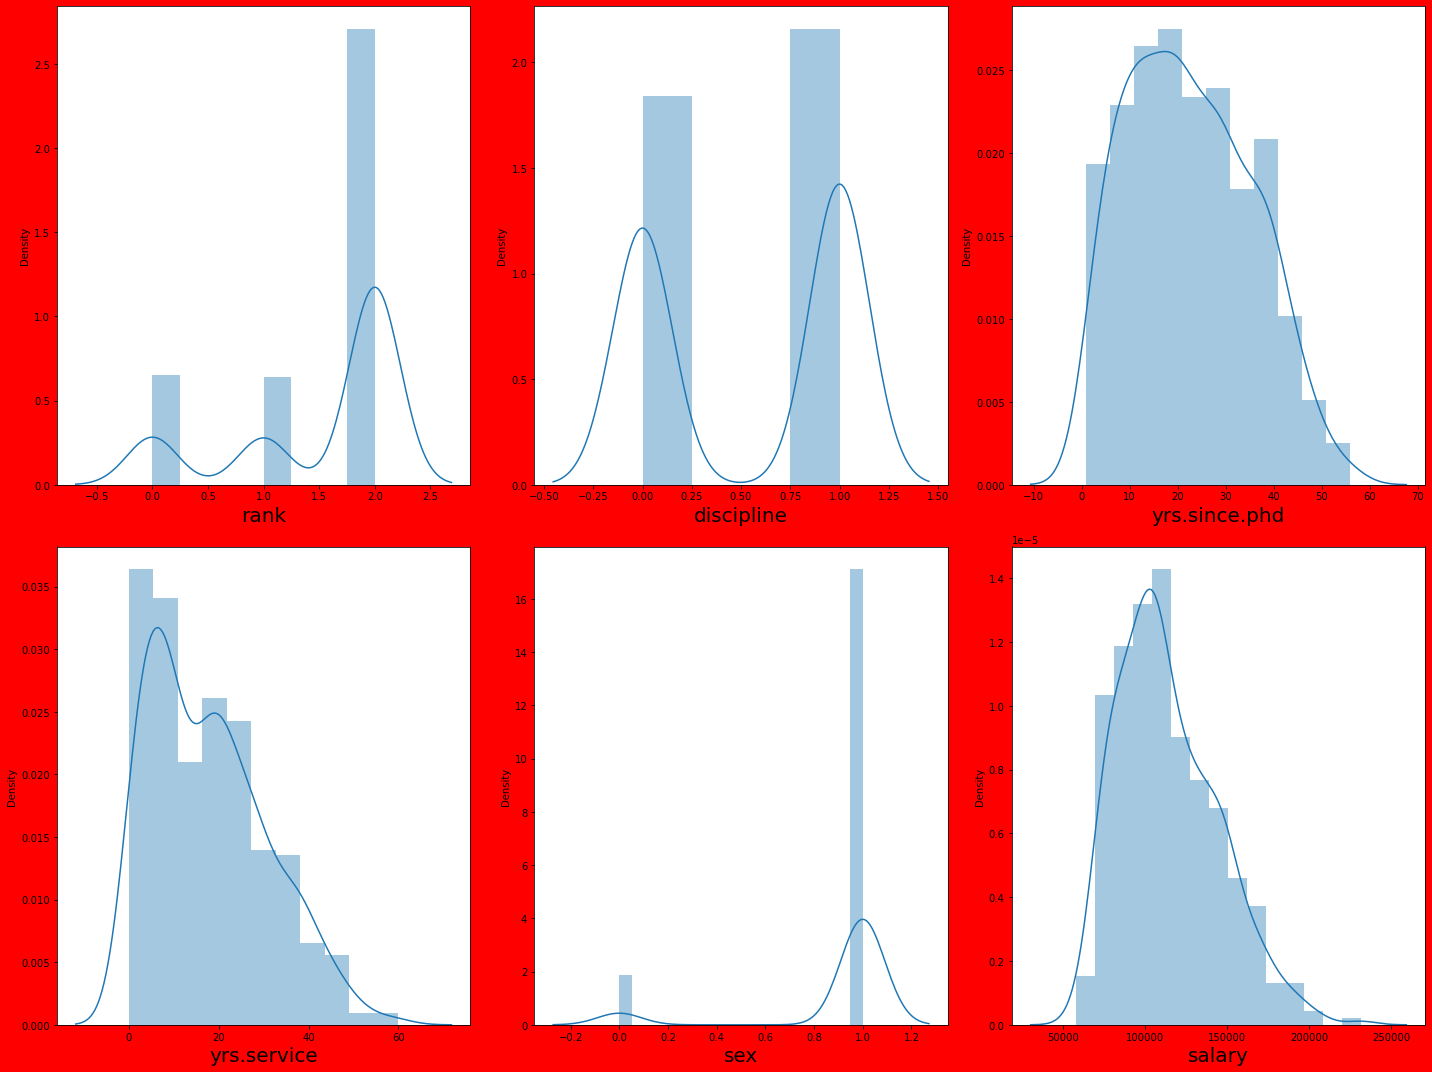

In [77]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber <= 6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        plotnumber += 1
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

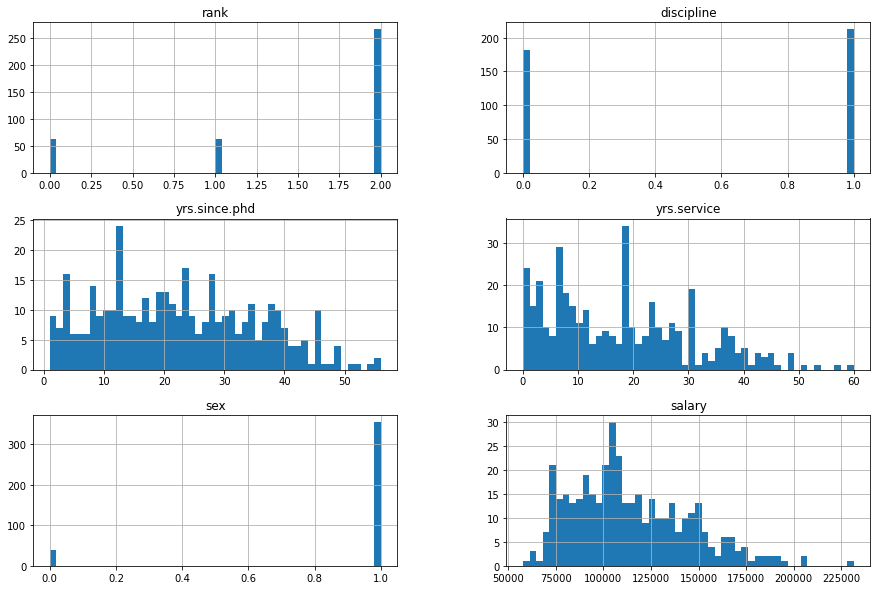

In [78]:
data.hist(bins=50, figsize=(15,10))
plt.show

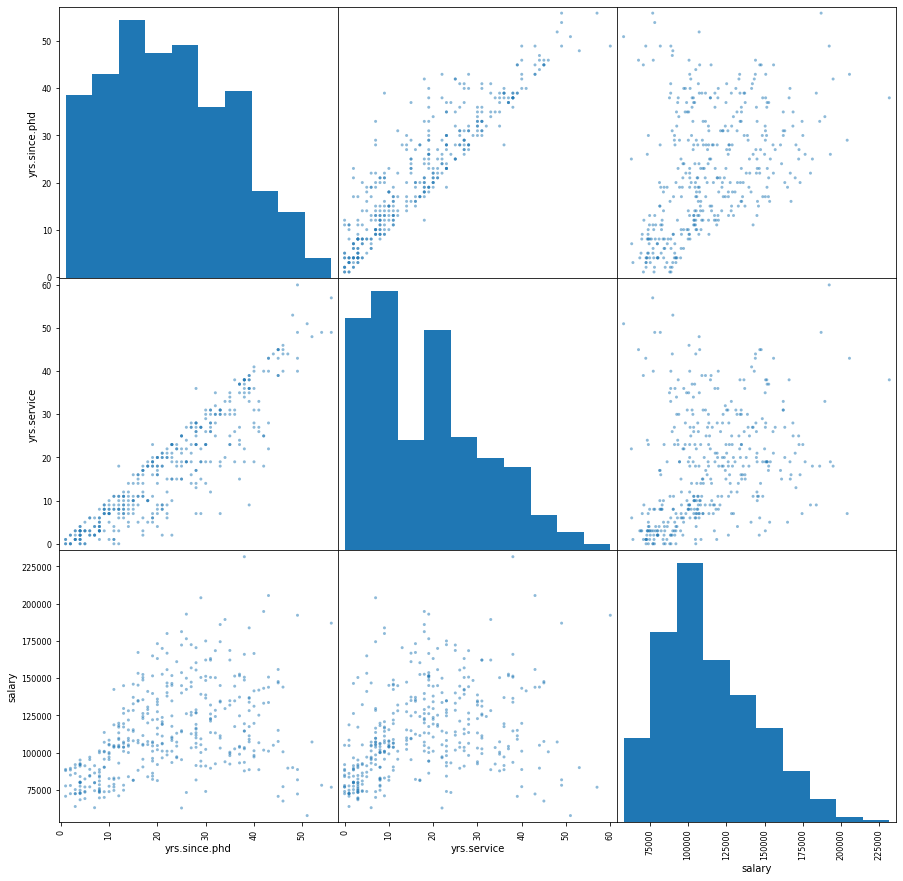

In [79]:
from pandas.plotting import scatter_matrix
col = ['yrs.since.phd','yrs.service','salary']
scatter_matrix(data[col], figsize=(15,15))
plt.show()

In [80]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [81]:
coulmn = data.columns

In [82]:
x = data.drop('salary', axis=1)
y = data['salary']

In [83]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [84]:
scaler = StandardScaler()
Xscaled = scaler.fit_transform(x)
Xscaled

array([[ 0.64064389,  0.92399869, -0.27377157,  0.01881993,  0.3319179 ],
       [ 0.64064389,  0.92399869, -0.19563633, -0.13526822,  0.3319179 ],
       [-0.67753961,  0.92399869, -1.44580016, -1.13684118,  0.3319179 ],
       ...,
       [ 0.64064389, -1.08225261,  1.52333895,  0.55812844,  0.3319179 ],
       [ 0.64064389, -1.08225261,  0.19503987, -0.21231229,  0.3319179 ],
       [-0.67753961, -1.08225261, -1.1332592 , -1.05979711,  0.3319179 ]])

In [85]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 393, dtype: int64

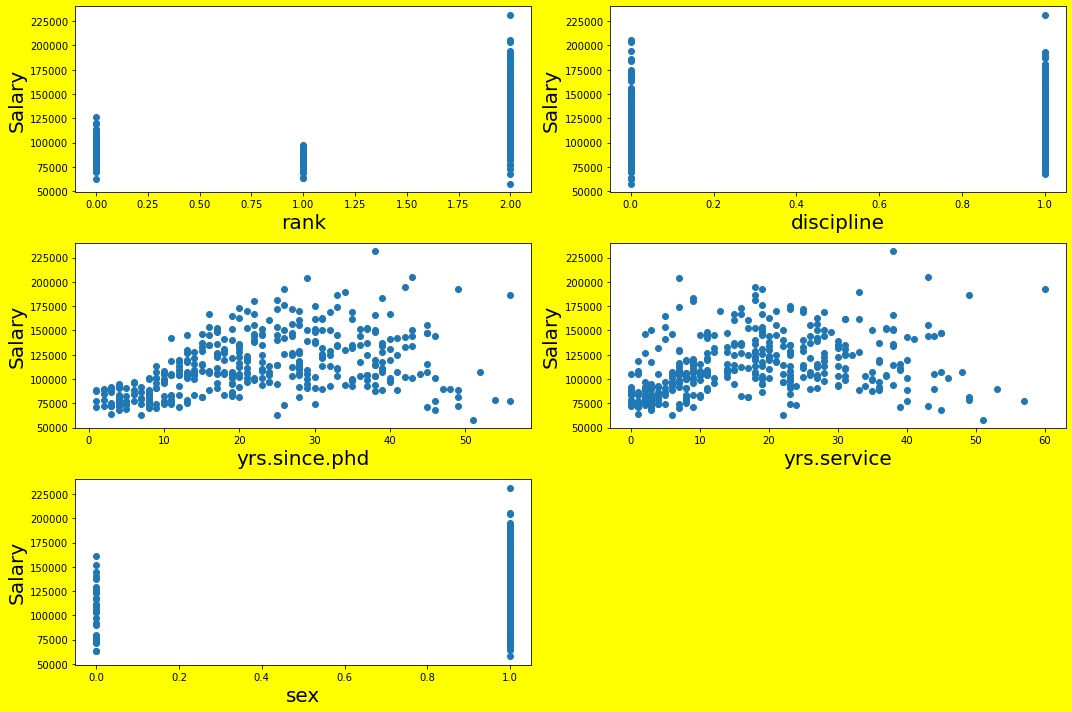

In [88]:
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber <= 5:
        plt.subplot(3,2,plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Salary', fontsize=20)
        plotnumber += 1
plt.tight_layout()

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize=(15,7))

sns.heatmap(data.corr(), annot=True, linewidth=0.5, linecolor='black', fmt='0.2f')

In [ ]:
data

In [89]:
x_train, x_test, y_train, y_test = train_test_split(Xscaled,y,test_size=0.2, random_state=1)

In [90]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [91]:
y_test_pred = regression.predict(x_test)
y_test_pred

array([123831.03751238, 131295.49626215, 117121.77862034,  81907.54292864,
        87618.97189756, 132083.79981215, 100468.49032387,  90112.48317357,
       145790.07429106, 135631.00960822, 128366.69197975, 121272.2723876 ,
       104200.71969875, 124304.76732178, 112553.0204607 , 137239.76686472,
        84018.43114136, 109054.03589938, 134392.29150934, 118561.59137628,
       100251.32058855,  69894.55328709, 105723.99583862,  88989.37861513,
        86380.25379869, 148299.66064532,  87382.23591141, 115850.91036496,
       128053.07177492, 130932.6972868 , 121859.48128053, 127128.92741664,
       136234.29357941, 121425.1418099 , 119443.80775896, 125270.85026832,
       131327.64641866,  88989.37861513,  82727.99663514, 125824.95546898,
        95573.23553499, 134159.04669578, 112754.11511776, 132589.67977805,
        74901.14208994,  98811.50783261, 127394.32238671, 137658.0312571 ,
        94431.92144139, 136419.31315822,  88656.59533938, 103553.36268241,
        93643.61789139, 1

In [92]:
regression.score(x_train, y_train)

0.3640720736612064

In [93]:
regression.score(x_test, y_test_pred)

1.0

In [95]:
regression.score(x_test, y_test)

0.3814221222135544

In [110]:
regression.predict(scaler.transform([[2,1,19,18,1]]))

array([125069.75561126])

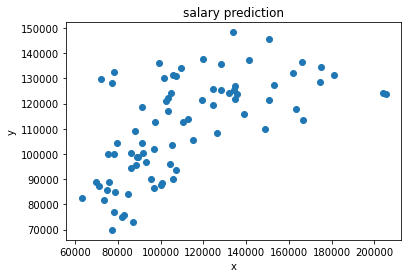

In [97]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title("salary prediction")
plt.show()

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

RandomForestRegressor()

In [100]:
rf.score(x_train, y_train)

0.8489038637902421

In [101]:
y_pred = rf.predict(x_test)

In [102]:
rf.score(x_test, y_pred)

1.0

In [103]:
from sklearn.metrics import r2_score

In [104]:
r2_score(y_test, y_pred)

0.494346113870788

In [106]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [ ]:
#Model Evaluation

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [113]:
mean_absolute_error(y_test, y_pred)

16222.667555706246

In [114]:
mean_squared_error(y_test, y_pred)

536724536.629054

In [115]:
np.sqrt(mean_squared_error(y_test, y_pred))

23167.316129173316

# error are getting to much and accuracy is alo very low, kindly guide on this how to get better accuracy, r2 score and less erros

In [117]:
#Regularization

In [ ]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [119]:
lasso = LassoCV(alphas=None, max_iter=100, normalize=True)
lasso.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [120]:
alpha=lasso.alpha_
alpha

52.433391629054015

In [121]:
lassoreg = Lasso(alpha)
lassoreg.fit(x_train, y_train)

Lasso(alpha=52.433391629054015)

In [123]:
lassoreg.score(x_train, y_train)

0.36399058085119196

In [124]:
lassoreg.score(x_test, y_test)

0.3792485943626922

In [125]:
ypred = lassoreg.predict(x_test)

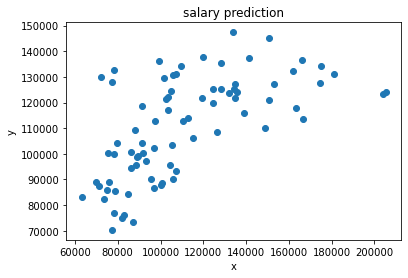

In [127]:
plt.scatter(y_test, ypred)
plt.xlabel('x')
plt.ylabel('y')
plt.title("salary prediction")
plt.show()